Jarak terdekat untuk menjemput penumpang 2.0
Titik-titik terdekat adalah (16, 41) dan (18, 41)


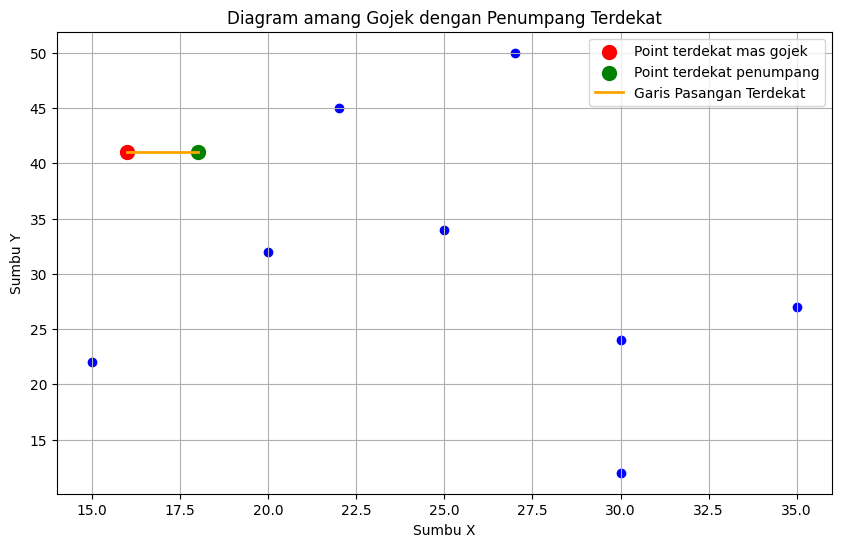

In [1]:
# Algoritma Divide Conquer
import math
import matplotlib.pyplot as plt

# Kelas Point untuk mendefinisikan koordinat 2D x dan y
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# Fungsi perbandingan untuk mengembalikan selisih koordinat x
def compareX(a, b):
    return a.x - b.x

# Fungsi perbandingan untuk mengembalikan selisih koordinat y
def compareY(a, b):
    return a.y - b.y

# Fungsi untuk menghitung jarak antara dua titik
def dist(p1, p2):
    return math.sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2)

# Fungsi untuk menemukan jarak terdekat menggunakan brute force
def bruteForce(P, n):
    min_dist = float("inf")
    closest_pair = (None, None)
    for i in range(n):
        for j in range(i + 1, n):
            d = dist(P[i], P[j])
            if d < min_dist:
                min_dist = d
                closest_pair = (P[i], P[j])
    return min_dist, closest_pair

# Fungsi untuk menemukan nilai minimum dari dua nilai
def min_val(x, y):
    return x if x < y else y

# Fungsi untuk menemukan jarak terdekat dalam strip
def stripClosest(strip, size, d):
    min_dist = d
    closest_pair = (None, None)
    strip = sorted(strip, key=lambda point: point.y)

    for i in range(size):
        for j in range(i + 1, size):
            if (strip[j].y - strip[i].y) >= min_dist:
                break
            if dist(strip[i], strip[j]) < min_dist:
                min_dist = dist(strip[i], strip[j])
                closest_pair = (strip[i], strip[j])
    return min_dist, closest_pair

# Fungsi utama divide and conquer untuk menemukan jarak terdekat
def closestUtil(P, n):
    if n <= 3:
        return bruteForce(P, n)
    
    mid = n // 2
    midPoint = P[mid]
    
    dl, left_pair = closestUtil(P[:mid], mid)
    dr, right_pair = closestUtil(P[mid:], n - mid)
    
    d = min_val(dl, dr)
    closest_pair = left_pair if dl < dr else right_pair
    
    strip = []
    for i in range(n):
        if abs(P[i].x - midPoint.x) < d:
            strip.append(P[i])
    
    strip_dist, strip_pair = stripClosest(strip, len(strip), d)
    
    if strip_dist < d:
        return strip_dist, strip_pair
    return d, closest_pair

# Fungsi untuk mengurutkan titik berdasarkan x dan memanggil closestUtil untuk menyelesaikan masalah
def closest(P, n):
    P = sorted(P, key=lambda point: point.x)
    return closestUtil(P, n)

# Fungsi untuk memplot titik dan garis pasangan terdekat
def plot_points(points, closest_pair):
    plt.figure(figsize=(10, 6))
    
    # Memplot semua titik
    for point in points:
        plt.scatter(point.x, point.y, color='blue')
    
    # Menyoroti pasangan terdekat
    if closest_pair[0] and closest_pair[1]:
        plt.scatter(closest_pair[0].x, closest_pair[0].y, color='red', s=100, label='Point terdekat mas gojek')
        plt.scatter(closest_pair[1].x, closest_pair[1].y, color='green', s=100, label='Point terdekat penumpang')
        
        # Menggambar garis antara pasangan terdekat
        plt.plot([closest_pair[0].x, closest_pair[1].x], [closest_pair[0].y, closest_pair[1].y], color='orange', linewidth=2, label='Garis Pasangan Terdekat')

    plt.title('Diagram amang Gojek dengan Penumpang Terdekat')
    plt.xlabel('Sumbu X')
    plt.ylabel('Sumbu Y')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Daftar titik yang merepresentasikan lokasi paket
    P = [
        Point(x=15, y=22),
        Point(x=25, y=34),
        Point(x=18, y=41),
        Point(x=30, y=12),
        Point(x=22, y=45),
        Point(x=20, y =32),
        Point(x=30, y=24),
        Point(x=16, y=41),
        Point(x=35, y=27),
        Point(x=27, y=50)
    ]

    n = len(P)
    min_dist, closest_pair = closest(P, n)

    # Mencetak hasil
    print(f"Jarak terdekat untuk menjemput penumpang {min_dist}")
    print(f"Titik-titik terdekat adalah ({closest_pair[0].x}, {closest_pair[0].y}) dan ({closest_pair[1].x}, {closest_pair[1].y})")

    # Memplot diagram kartesius
    plot_points(P, closest_pair)